# EBAC - Scripting

## Tarefa I

1. Crie um jupyter notebook com os imports necessários e um código para gerar os gráficos referentes a base de dados de março, abril, maio, junho e dezembro (numa célula só ou em várias).<br>
2. Como que você poderia fazer para deixar isso mais automatizado? Descreva na última célula do jupyter notebook o que ajudaria na hora de gerar novos gráficos pros meses/anos seguintes.

Por favor insira o mês do arquivo .csv (Ex: 01 para Jan), caso seja uma base geral insira 99: 99
Deseja realizar uma análise mensal ou anual? mensal
Qual mês deseja realizar a análise? (Ex: 01 para Jan) 12


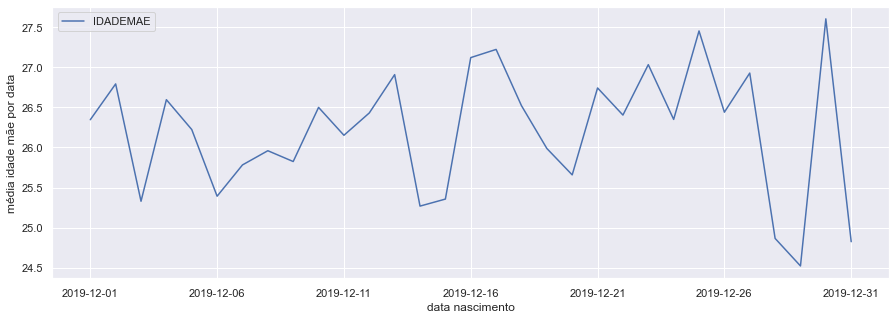

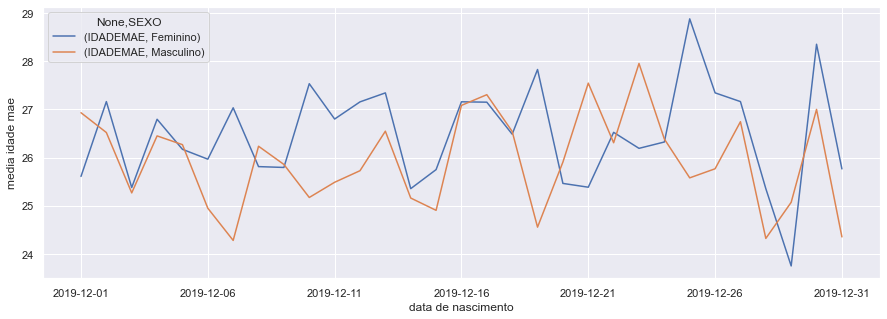

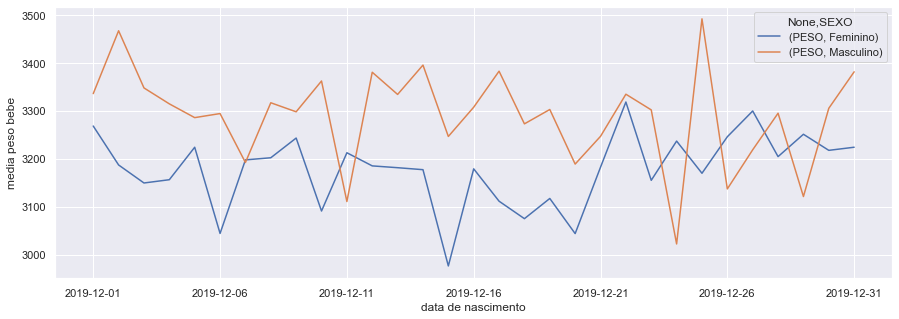

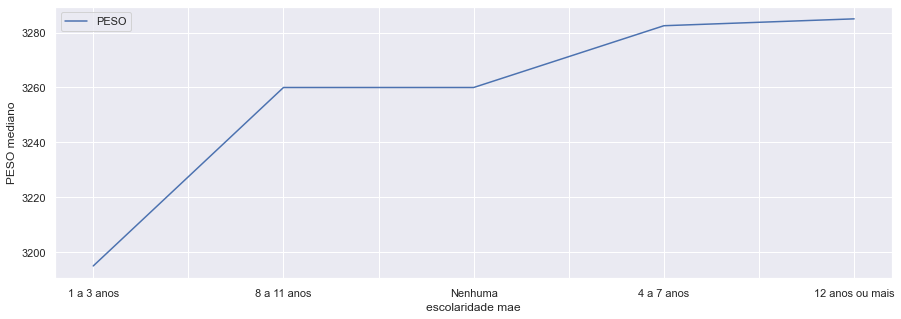

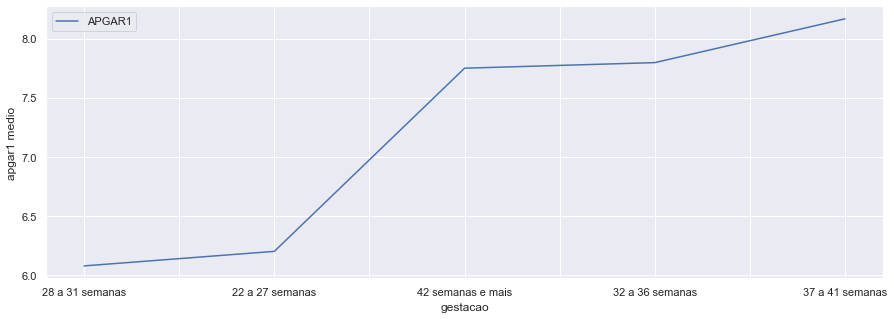

In [12]:
# Minha ideia foi permitir inserir o mês que deseja realizar a análise e se deseja a análise mensal ou anual.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

sns.set()

# Solicitando inputs do usuário

mes_arq = input('Por favor insira o mês do arquivo .csv (Ex: 01 para Jan), caso seja uma base geral insira 99: ')
analise = input('Deseja realizar uma análise mensal ou anual? ')
if analise == 'mensal':
    mes = input('Qual mês deseja realizar a análise? (Ex: 01 para Jan) ')
else:
    cond = input('Deseja fazer de um mês até o início do ano? (s/n): ')
    if cond == 's':
        mes = input('Qual mês deseja realizar a análise? (Ex: 01 para Jan) ')
    else:
        mes = 99

# Criando a função

def plota_pivot_table(df, value, index, func, ylabel, xlabel, opcao='nada'):
    if opcao == 'nada':
        pd.pivot_table(df, values=value, index=index,aggfunc=func).plot(figsize=[15, 5])
    elif opcao == 'unstack':
        pd.pivot_table(df, values=value, index=index,aggfunc=func).unstack().plot(figsize=[15, 5])
    elif opcao == 'sort':
        pd.pivot_table(df, values=value, index=index,aggfunc=func).sort_values(value).plot(figsize=[15, 5])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    return None

# Gerando um dicionário dos meses do ano

meses = {'01':'JAN','02':'FEV','03':'MAR','04':'ABR','05':'MAI','06':'JUN','07':'JUL','08':'AGO','09':'SET','10':'OUT','11':'NOV','12':'DEZ'}

# Ler o arquivo com base nos inputs do usuário

if mes_arq == '99':
    sinasc = pd.read_csv('./input/SINASC_RO_2019.csv')
else:
    sinasc = pd.read_csv('./input/SINASC_RO_2019_'+meses[mes_arq]+'.csv')

# Converter a coluna de datas do formato str pra datetime

sinasc['DTNASC_EDIT'] = pd.to_datetime(sinasc['DTNASC'], format='%Y-%m-%d')

# Convertendo o input

mes_int = int(mes)

# Filtrando o Dataframe caso tenham escolhido uma análise mensal

if analise == 'anual':
    sinasc_filter = sinasc.loc[sinasc['DTNASC_EDIT'].dt.month <= mes_int]
else:
    sinasc_filter = sinasc.loc[sinasc['DTNASC_EDIT'].dt.month == mes_int]

# Criando a variável max_data
    
if mes == '99':
    max_data = sinasc_filter.DTNASC.max()[:7]
elif mes_int < 10:
    max_data = (str(sinasc_filter.DTNASC_EDIT.dt.year.max())+'-0'+str(sinasc_filter.DTNASC_EDIT.dt.month.max()))
else:
    max_data = (str(sinasc_filter.DTNASC_EDIT.dt.year.max())+'-'+str(sinasc_filter.DTNASC_EDIT.dt.month.max()))

# Criar pastas

os.makedirs('./output/figs/'+max_data+'-'+analise, exist_ok=True)

# Criar e salvar os gráficos

plota_pivot_table(sinasc_filter, 'IDADEMAE', 'DTNASC', 'mean', 'média idade mãe por data', 'data nascimento')
plt.savefig('./output/figs/'+max_data+'-'+analise+'/media idade mae por data.png')

plota_pivot_table(sinasc_filter, 'IDADEMAE', ['DTNASC', 'SEXO'], 'mean', 'media idade mae','data de nascimento','unstack')
plt.savefig('./output/figs/'+max_data+'-'+analise+'/media idade mae por sexo.png')

plota_pivot_table(sinasc_filter, 'PESO', ['DTNASC', 'SEXO'], 'mean', 'media peso bebe','data de nascimento','unstack')
plt.savefig('./output/figs/'+max_data+'-'+analise+'/media peso bebe por sexo.png')

plota_pivot_table(sinasc_filter, 'PESO', 'ESCMAE', 'median', 'PESO mediano','escolaridade mae','sort')
plt.savefig('./output/figs/'+max_data+'-'+analise+'/PESO mediano por escolaridade mae.png')

plota_pivot_table(sinasc_filter, 'APGAR1', 'GESTACAO', 'mean', 'apgar1 medio','gestacao','sort')
plt.savefig('./output/figs/'+max_data+'-'+analise+'/media apgar1 por gestacao.png')

**Análise:** Criei um código mais geral que permite escolher o mês que deseja os gráficos, ao invés de realizar um código para cada mês.<br>
Acredito ter dado uma pequena automatizada, pelo menos esse código pode ser usado para todo o ano de 2019. Para atualizar para os próximos anos só pedir um input do ano e criar mais umas linhas de código para podermos trabalhar com a variável ano, isso tudo seria muito semelhante ao que eu fiz na variável mes.